## Pandas analysis

In the following a series of exercises is proposed on a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGA's. Each measurement (i.e. each raw) consists of the address of the TDC providing the signal, 'FPGA' and 'TDC_Channel, and the timing information itself, 'ORBIT_CNT', 'BX_COUNTER' and 'TDC_MEAS'. Each TDC count correspond 25/30 ns, whereas the BX_COUNTER feauters gets updated every 25 ns and the ORBIT_CNT every 'x' BX_COUNTER. You can see these way of storing the time as similar to hours, minutes and seconds.

1\. Create a Pandas DataFrame by read N raws of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of raws and larger that 10k.

2\. Find out the value of 'x'

3\. Find out how much the data taking lasted. You can either make an estimate on the baseis of the fraction of the measurements (raws) you read, or perform this check precisely by reading out the whole dataset

4\. Create a new column with the actual time in ns (as a combination of the other three columns with timing information)

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1

6\. Create a new DataFrame with only the raws with HEAD=1

7\. Make two occupancy plots (one per FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

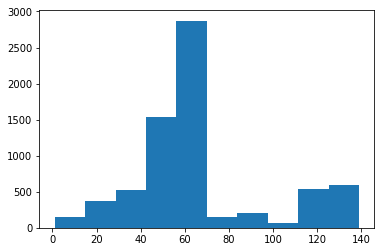

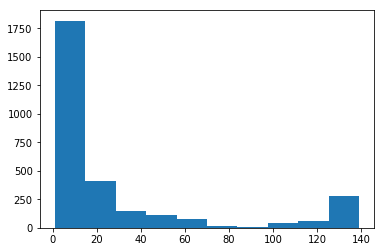

101

In [7]:
# seems like the ghost file has this structure
# FPGA TDC_Channel ORBIT_CNT BTX_COUNTER TDC_MEAS HEAD
# the last column HEAD comes from point 5?

import numpy as np
import pandas as pd

N = 10000 # don't know how many rows there are in the ghost file, i assume 10k

df = pd.read_csv("./data_000637.txt", nrows = N)

x = df["BX_COUNTER"].max()+1
x
# since i do not even have the file, i am forced to perform an estimate
# let N_tot be the total number of rows in the ghost file

N_tot = 1310720 # to be replaced with the real value which i assume is known

df["t"] = df["TDC_MEAS"]*25/30 + df["BX_COUNTER"]*25 + df["ORBIT_CNT"]*x*25

T_tot = ( df.iat[N-1, 6] - df.iat[0, 6] ) * ( N_tot / N ) # maybe the first read does not start with t = 0? who knows?
T_tot

np.random.seed(21)
df["HEAD"] = pd.Series(np.random.randint(0, 2), df.index)

df_1 = df[df["HEAD"] == 1]

fpga_0 = df[df["FPGA"] == 0]["TDC_CHANNEL"]
fpga_1 = df[df["FPGA"] == 1]["TDC_CHANNEL"]

import matplotlib.pyplot as plt

plt.hist(fpga_0)
plt.show()
plt.hist(fpga_1)
plt.show()

noise = pd.DataFrame(df.groupby("TDC_CHANNEL").count()).reset_index()
noise.sort_values(by=["FPGA"], ascending=False).head(3)

df["ORBIT_CNT"].nunique()
df[df["TDC_CHANNEL"] == 139]["ORBIT_CNT"].nunique()

In [8]:
x

3564

In [9]:
T_tot

1162617044.992

In [11]:
noise.sort_values(by=["FPGA"], ascending=False).head(3)

TDC_CHANNEL  HEAD  FPGA  ORBIT_CNT  BX_COUNTER  TDC_MEAS    t
128          139   860   860        860         860       860  860
62            63   499   499        499         499       499  499
63            64   491   491        491         491       491  491